# Speech to Text Transcription with the Cloud Speech API

GSP048

https://www.cloudskillsboost.google/focuses/2187?parent=catalog&qlcampaign=1p-EDUCR-SG-2021-MAJULAHGCP-2-25

## Overview

The Speech-to-Text API lets you transcribe audio speech files to text files in over 80 languages.

In this lab you'll send an audio file to the Speech API for transcription.

You will learn how to
- Create a Speech-to-Text API request and call the API with `curl`
- Call the Speech-to-Text API with audio files in a different language

# Create an API key
Since you'll be using `curl` to send a request to the Speech-to-Text API, you'll need to generate an API key to pass in your request URL.

To create an API key, navigate to:

`APIs & services` > `Credentials`. Click `Create credentials` and select `API key`.

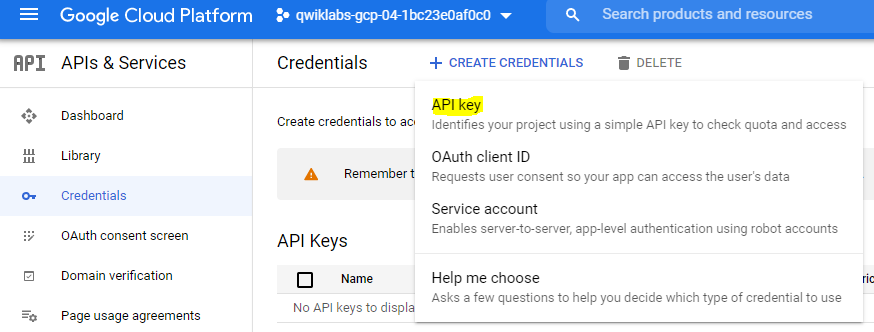

Next, copy the key you just generated. Click `Close`.

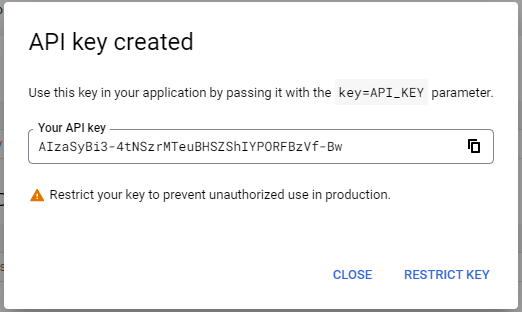

Now save your key to an environment variable to avoid having to insert the value of your API key in each request.

In order to perform next steps please connect to the linux-instance provisioned for you via SSH. Click on `SSH` button, you'll see an interactive shell, use this for performing next operations.


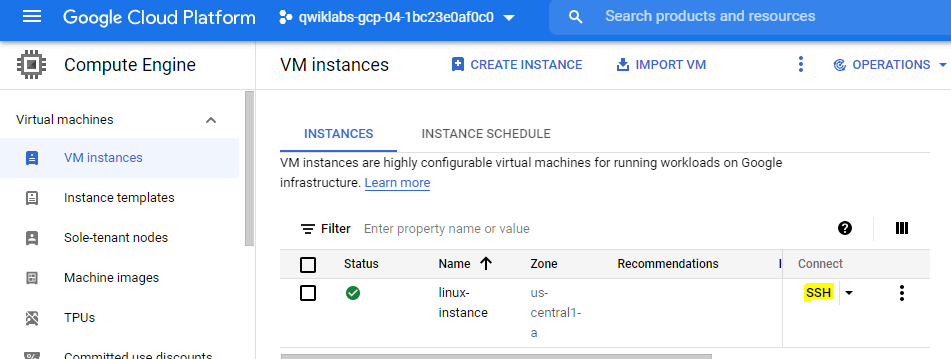

In the shell (SSH) run the following, replacing <your_api_key> with the key you just copied:

In [ ]:
export API_KEY=<YOUR_API_KEY>

# Create your API request

Note: This lab uses a pre-recorded file that's available on Cloud Storage: gs://cloud-samples-data/speech/brooklyn_bridge.flac. You can listen to this file before sending it to the Speech-to-Text API [here](https://storage.cloud.google.com/cloud-samples-data/speech/brooklyn_bridge.flac).

Build your request to the API in a `request.json` file:

In [ ]:
touch request.json

Open the file using your preferred command line editor (nano, vim, emacs) or gcloud. 

In [ ]:
nano request.json

Add the following to your `request.json` file, using the uri value of the sample raw audio file:

In [ ]:
{
  "config": {
      "encoding":"FLAC",
      "languageCode": "en-US"
  },
  "audio": {
      "uri":"gs://cloud-samples-data/speech/brooklyn_bridge.flac"
  }
}

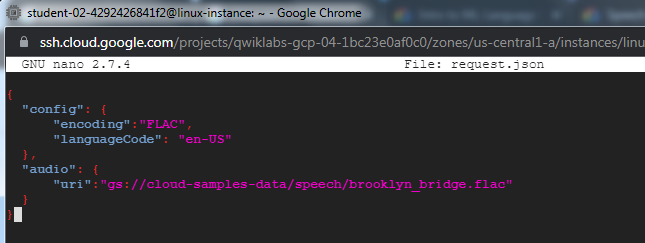

The request body has a `config` and `audio` object.

In `config`, you tell the Speech-to-Text API how to process the request:

- The `encoding` parameter tells the API which type of audio encoding you're using while the file is being sent to the API. `FLAC` is the encoding type for .raw files (here is documentation for encoding types for more details).
- `languageCode` will default to English if left out of the request.

There are other parameters you can add to your `config` object, but `encoding` is the only required one.

In the `audio` object, you pass the API the uri of the audio file which is stored in Cloud Storage for this lab.

# Call the Speech-to-Text API

Pass your request body, along with the API key environment variable, to the API with the following `curl` command (all in one single command line):

In [ ]:
curl -s -X POST -H "Content-Type: application/json" --data-binary @request.json \
"https://speech.googleapis.com/v1/speech:recognize?key=${API_KEY}" > result.json

Your response is stored in a file named as `result.json`. In order to see the contents of file you can use:

In [ ]:
cat result.json

The response returned by the `curl` command look something like this:

In [ ]:
{
  "results": [
    {
      "alternatives": [
        {
          "transcript": "how old is the Brooklyn Bridge",
          "confidence": 0.98267895
        }
      ]
    }
  ]
}

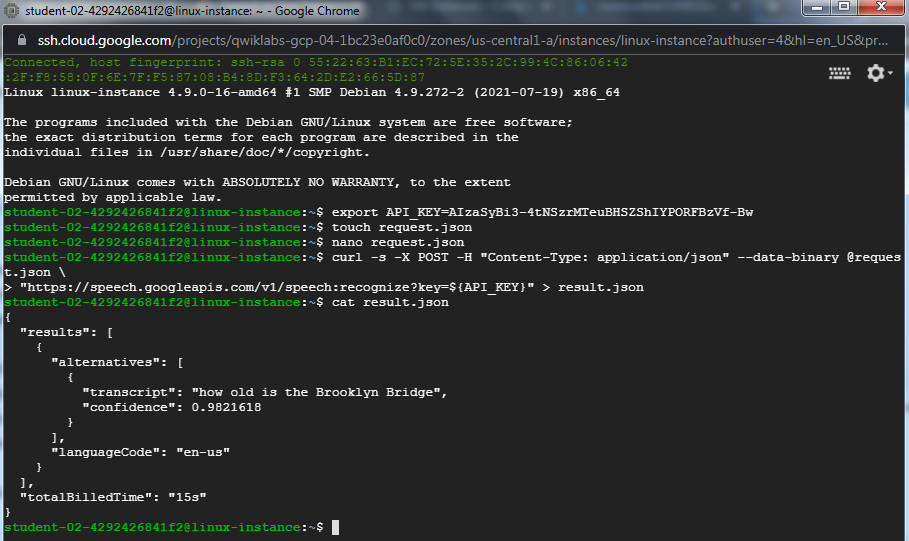

The `transcript` value will return the Speech API's text transcription of your audio file, and the `confidence` value indicates how sure the API is that it has accurately transcribed your audio.

Notice that you called the `syncrecognize` method in our request above. The Speech-to-Text API supports both synchronous and asynchronous speech to text transcription. In this example a complete audio file was used, but you can also use the `syncrecognize` method to perform streaming speech to text transcription while the user is still speaking.

# Speech to text transcription in different languages

Are you multilingual? The Speech-to-Text API supports speech to text transcription in over 100 languages! You can change the `language_code` parameter in `request.json`. You can find a list of supported languages [here](https://cloud.google.com/speech/docs/languages).

Try a French audio file - (listen to it [here](https://storage.cloud.google.com/cloud-samples-data/speech/corbeau_renard.flac) if you’d like a preview).

Edit your `request.json` and change the content to the following:

In [ ]:
 {
  "config": {
      "encoding":"FLAC",
      "languageCode": "fr"
  },
  "audio": {
      "uri":"gs://cloud-samples-data/speech/corbeau_renard.flac"
  }
}

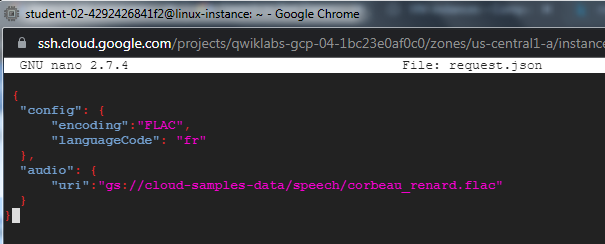

Now call Speech-to-Text by running the `curl` command again.

You should see the following response:

In [ ]:
{
  "results": [
    {
      "alternatives": [
        {
          "transcript": "maître corbeau sur un arbre perché tenait en son bec un fromage",
          "confidence": 0.9710122
        }
      ]
    }
  ]
}

This is a sentence from a popular French [children’s tale](https://fr.wikipedia.org/wiki/Le_Corbeau_et_le_Renard) by Jean de la Fontaine. 

If you’ve got audio files in another language, you can try adding them to Cloud Storage and changing the `languageCode` parameter in your request.

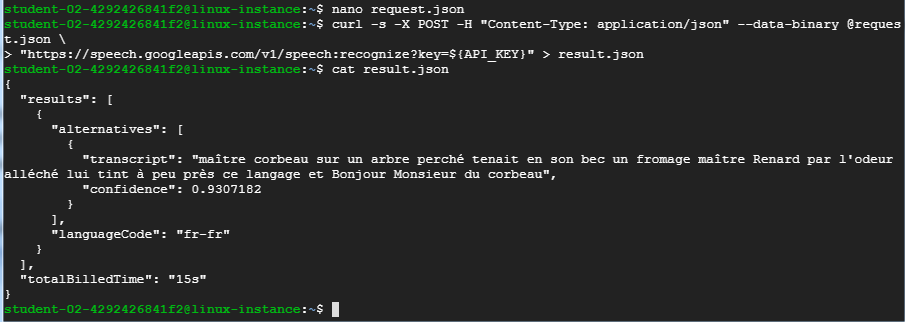